
# Define ML problems

**We recommend that you use your portfolio project dataset for all assignments this sprint.**

**But if you aren't ready yet, or you want more practice, then use the New York City property sales dataset for today's assignment.** Follow the instructions below, to just keep a subset for the Tribeca neighborhood, and remove outliers or dirty data. [Here's a video walkthrough](https://youtu.be/pPWFw8UtBVg?t=584) you can refer to if you get stuck or want hints!

- Data Source: [NYC OpenData: NYC Citywide Rolling Calendar Sales](https://data.cityofnewyork.us/dataset/NYC-Citywide-Rolling-Calendar-Sales/usep-8jbt)
- Glossary: [NYC Department of Finance: Rolling Sales Data](https://www1.nyc.gov/site/finance/taxes/property-rolling-sales-data.page)

## Assignment

Complete these tasks for your assignment/project, and document your decisions.

- [ ] Choose your target. Which column in your tabular dataset will you predict?
- [ ] Is your problem regression or classification?
- [ ] How is your target distributed?
    - Classification: How many classes? Are the classes imbalanced?
    - Regression: Is the target right-skewed? If so, you may want to log transform the target.
- [ ] Choose your evaluation metric(s).
    - Classification: Is your majority class frequency >= 50% and < 70% ? If so, you can just use accuracy if you want. Outside that range, accuracy could be misleading. What evaluation metric will you choose, in addition to or instead of accuracy?
    - Regression: Will you use mean absolute error, root mean squared error, R^2, or other regression metrics?
- [ ] Choose which observations you will use to train, validate, and test your model.
    - Are some observations outliers? Will you exclude them?
    - Will you do a random split or a time-based split?
- [ ] Begin to clean and explore your data.
- [ ] Begin to choose which features, if any, to exclude. Would some features "leak" future information?

If you haven't found a dataset yet, do that today. Review requirements for your portfolio project on Canvas, and choose your dataset.

Some students worry, ***what if my model isn't “good”?*** Then, [produce a detailed tribute to your wrongness. That is science!](https://twitter.com/nathanwpyle/status/1176860147223867393)

In [20]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [21]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [25]:
cancer['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [22]:
import numpy as np
import pandas as pd
# create datafrmae
df = pd.DataFrame(np.c_[cancer['data'],cancer['target']],
             columns = np.append(cancer['feature_names'], ['target']))

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [23]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

In [38]:
df.shape

(569, 31)

In [29]:
df.isnull().sum().sum()

0

In [24]:
df['target'].value_counts()
# 0 malignant tumor
# 1 benign tumor

1.0    357
0.0    212
Name: target, dtype: int64

In [30]:
# Choose your target. Which column in your tabular dataset will you predict?
y=df['target']


Is your problem regression or classification?

**classification**

In [31]:
# How is your target distributed?
# Classification: How many classes? Are the classes imbalanced?
y.value_counts(normalize=True).max()

0.6274165202108963

In [33]:
X = df.drop(columns='target')

In [37]:
X.shape

(569, 30)

In [56]:
# Choose your evaluation metric(s).
# Classification: Is your majority class frequency >= 50% and < 70% ? If so, you can just use accuracy if you want.
# Outside that range, accuracy could be misleading. What evaluation metric will you choose, in addition to or instead of accuracy?

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from category_encoders import OneHotEncoder
from sklearn.impute import SimpleImputer


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with a DecisionTreeClassifier
model = make_pipeline(
     SimpleImputer(),
     DecisionTreeClassifier(max_depth=3, random_state=42))

model.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=3, random_state=42))])

In [58]:
print('training acc:', model.score(X_train, y_train))
print('validation acc:', model.score(X_val, y_val))

training acc: 0.978021978021978
validation acc: 0.9473684210526315


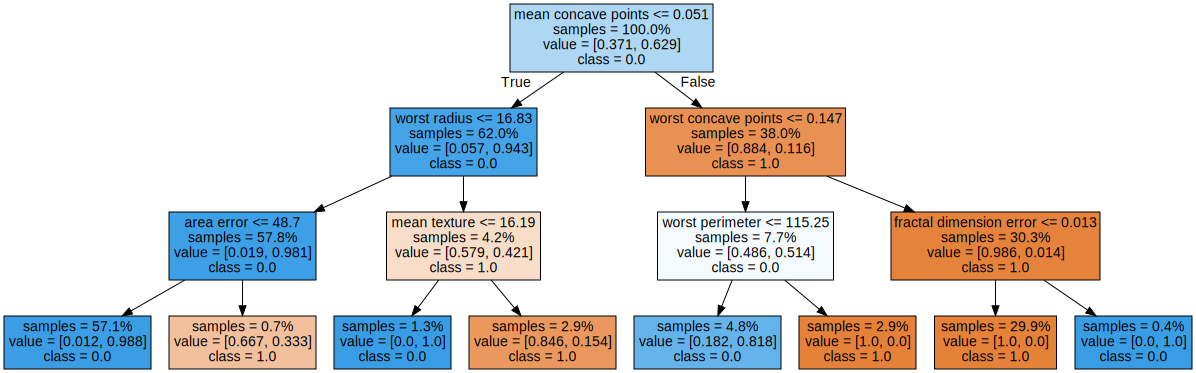

In [59]:
import graphviz
from sklearn.tree import export_graphviz
tree = model.named_steps['decisiontreeclassifier']
dot_data = export_graphviz(tree,out_file=None,feature_names=X_train.columns,class_names=y_train.unique().astype(str),filled=True,impurity=False,proportion=True)
graphviz.Source(dot_data)

In [63]:
# Use sklearn to calculate ROC AUC
from sklearn.metrics import roc_auc_score
y_pred_proba = model.predict_proba(X_val)[:,-1] #probability for the last class
roc_auc_score(y_val,y_pred_proba)

0.9574189321978381